In [ ]:
import os
os.chdir('..')

In [2]:
from src.data.datasets import MetaDataset, ClassImagesSet, SimpleDataset, MultipleMetaDatasets
from src.data.dataset_managers import MetaDataLoader
from src.config import meta_dataset_config

In [3]:
train_classes = {}
for train_json_path in meta_dataset_config.TRAIN_JSONS:
    train_file = os.path.join('data/meta_dataset/mds_tfrecords', train_json_path)
    mds_dataset = train_json_path.split('/')[-2]
    assert mds_dataset in meta_dataset_config.ALL_DATASETS
    train_classes[mds_dataset] = ClassImagesSet(train_file, preload=False)

loading image paths, labels from json  data/meta_dataset/mds_tfrecords/aircraft/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/cu_birds/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/dtd/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/fungi/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/ilsvrc_2012/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/omniglot/base.json
loading image paths, labels from json  data/meta_dataset/mds_tfrecords/vgg_flower/base.json


In [4]:
train_classes.keys()

dict_keys(['aircraft', 'cu_birds', 'dtd', 'fungi', 'ilsvrc_2012', 'omniglot', 'vgg_flower'])

In [5]:
train_meta_dataset = MultipleMetaDatasets(
                        multiple_support_class_images_set_dict=train_classes,
                        multiple_query_class_images_set_dict=train_classes, 
                        image_size=84,
                        support_aug=True,
                        query_aug=True,
                        fix_support=0,
                        save_folder='./test_functionality',
                        fix_support_path='')

setting up aircraft
No. of classes in set support 70                 query 70
Support set is fixed: False
support aug: True query aug: True
Setting support loader for class 0 using 100 images from class
Setting support loader for class 1 using 100 images from class
Setting support loader for class 2 using 100 images from class
Setting support loader for class 3 using 100 images from class
Setting support loader for class 4 using 100 images from class
Setting support loader for class 5 using 100 images from class
Setting support loader for class 6 using 100 images from class
Setting support loader for class 7 using 100 images from class
Setting support loader for class 8 using 100 images from class
Setting support loader for class 9 using 100 images from class
Setting support loader for class 10 using 100 images from class
Setting support loader for class 11 using 100 images from class
Setting support loader for class 12 using 100 images from class
Setting support loader for class 13 us

In [6]:
train_meta_dataset[
    {
        'dataset_name': 'aircraft',
        'task_idx': 0,
        'cl': 0,
        'n_shot': 5,
        'n_query': 15,
        'cl_label': 0,
    }
]

{'task_idx': 0,
 'cl': 0,
 'support_x_cl': tensor([[[[ 0.5037,  0.5037,  0.5037,  ...,  0.5179,  0.5179, -0.9535],
           [ 0.5037,  0.5037,  0.5037,  ...,  0.5179,  0.5179, -0.9535],
           [ 0.5037,  0.5037,  0.5037,  ...,  0.5179,  0.5179, -0.9535],
           ...,
           [ 0.5603,  0.5603,  0.5603,  ...,  0.5462,  0.5462, -0.9535],
           [ 0.5603,  0.5603,  0.5603,  ...,  0.5462,  0.5462, -0.9535],
           [-0.9535, -0.9535, -0.9535,  ..., -0.9535, -0.9535, -0.9535]],
 
          [[ 0.9287,  0.9287,  0.9287,  ...,  0.9433,  0.9433, -0.9168],
           [ 0.9287,  0.9287,  0.9287,  ...,  0.9433,  0.9433, -0.9168],
           [ 0.9287,  0.9287,  0.9287,  ...,  0.9433,  0.9433, -0.9168],
           ...,
           [ 0.9433,  0.9433,  0.9433,  ...,  0.9726,  0.9726, -0.9168],
           [ 0.9433,  0.9433,  0.9433,  ...,  0.9726,  0.9726, -0.9168],
           [-0.9168, -0.9168, -0.9168,  ..., -0.9168, -0.9168, -0.9168]],
 
          [[ 1.3572,  1.3572,  1.3572,  ...,

In [7]:
train_meta_dataset.dataset_names()

{'aircraft',
 'cu_birds',
 'dtd',
 'fungi',
 'ilsvrc_2012',
 'omniglot',
 'vgg_flower'}

In [8]:
batch_size=4
n_batches = 10
n_way=5
n_shot=5
n_query=15
p_dict = {
'aircraft':0.5,
 'cu_birds':0.,
 'dtd':0.,
 'fungi':0.,
 'ilsvrc_2012':0.5,
 'omniglot':0.,
 'vgg_flower':0.
}

In [9]:
train_loader = MetaDataLoader(
                    dataset=train_meta_dataset,
                    batch_size=batch_size,
                    n_batches=n_batches,
                    n_way=n_way,
                    n_shot=n_shot,
                    n_query=n_query,
                    p_dict=p_dict,
                    randomize_query=False)

Size of Support: 5
Size of Query: 15 randomize query False
p_dict {'aircraft': 0.5, 'cu_birds': 0.0, 'dtd': 0.0, 'fungi': 0.0, 'ilsvrc_2012': 0.5, 'omniglot': 0.0, 'vgg_flower': 0.0}
n_way 5 5 15
dataset name: aircraft with dataset probability 0.5
Setting an episodic sampler over 70 classes
(0, 0.014285714285714285)
(1, 0.014285714285714285)
(2, 0.014285714285714285)
(3, 0.014285714285714285)
(4, 0.014285714285714285)
(5, 0.014285714285714285)
(6, 0.014285714285714285)
(7, 0.014285714285714285)
(8, 0.014285714285714285)
(9, 0.014285714285714285)
(10, 0.014285714285714285)
(11, 0.014285714285714285)
(12, 0.014285714285714285)
(13, 0.014285714285714285)
(14, 0.014285714285714285)
(15, 0.014285714285714285)
(16, 0.014285714285714285)
(17, 0.014285714285714285)
(18, 0.014285714285714285)
(19, 0.014285714285714285)
(20, 0.014285714285714285)
(21, 0.014285714285714285)
(22, 0.014285714285714285)
(23, 0.014285714285714285)
(24, 0.014285714285714285)
(25, 0.014285714285714285)
(26, 0.014285714

In [10]:
for data in train_loader:
    break

In [11]:
len(data)

4

In [12]:
support_x, support_y, query_x, query_y = data

In [13]:
support_x.shape

torch.Size([4, 25, 3, 84, 84])

In [17]:
def chw2hwc(img):
    return np.transpose(a=img, axes=(1,2,0))

def naive_normalize(x):
    return (x - np.amin(x)) / (np.amax(x) - np.amin(x))

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
SCALE = 3

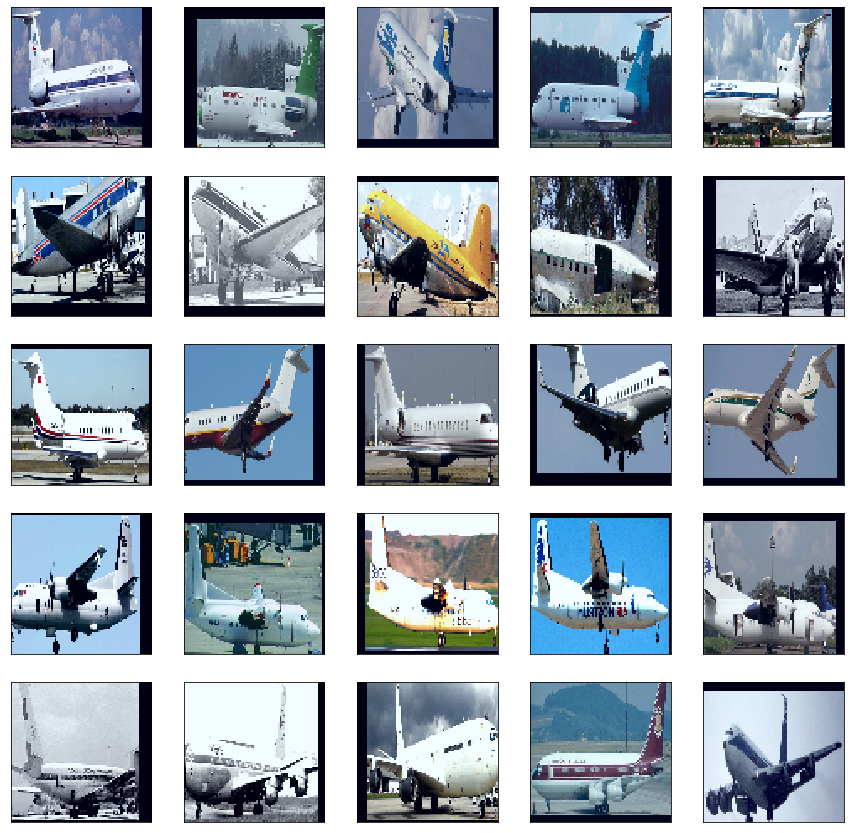

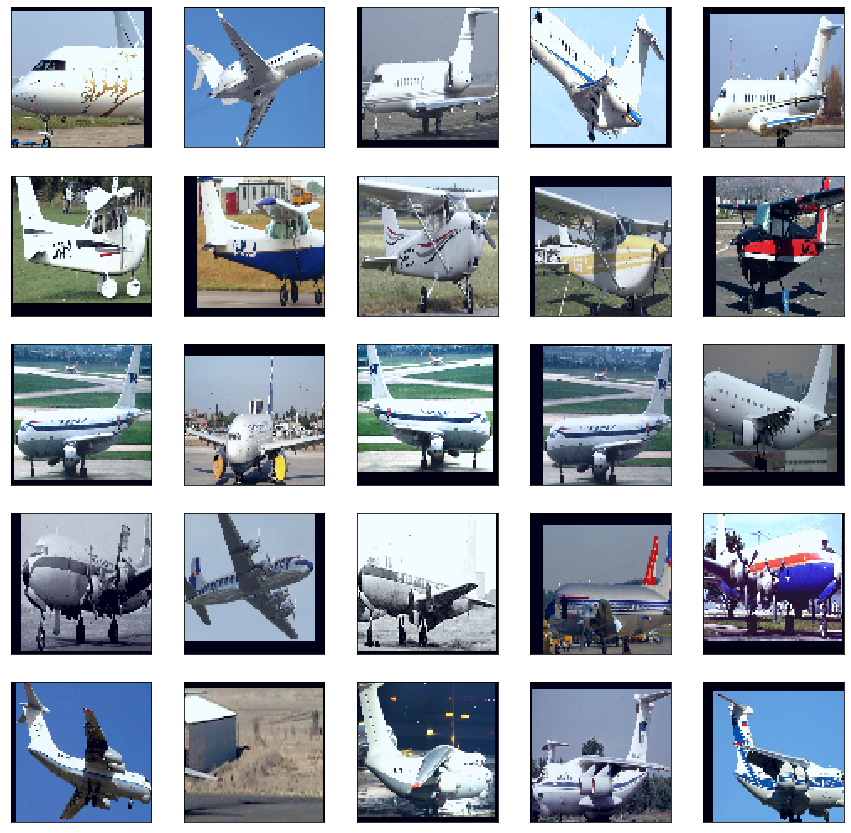

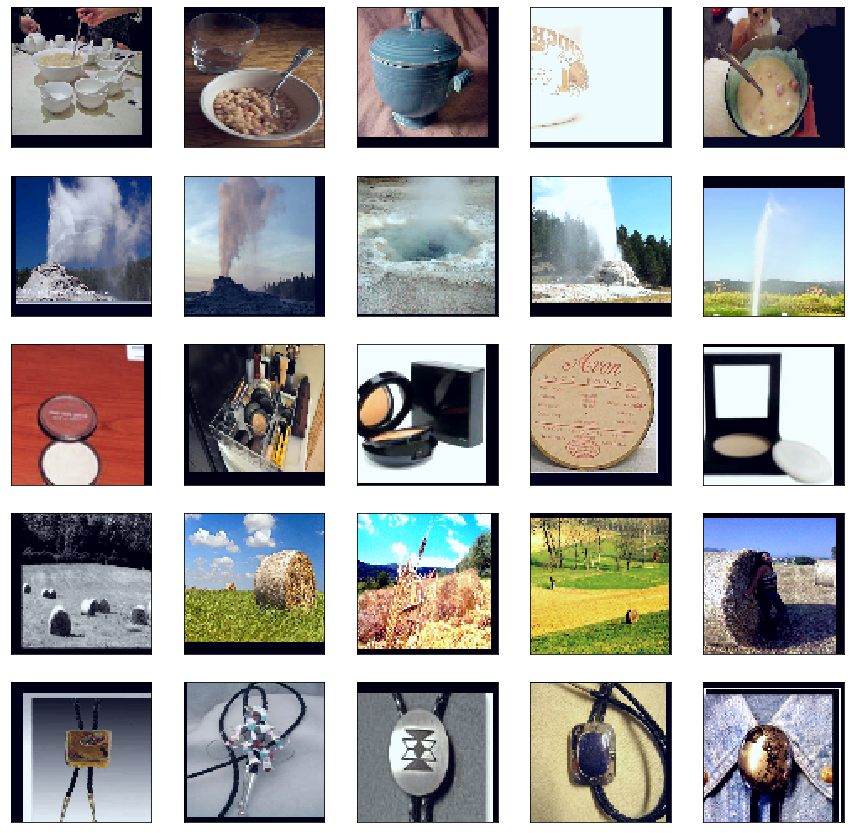

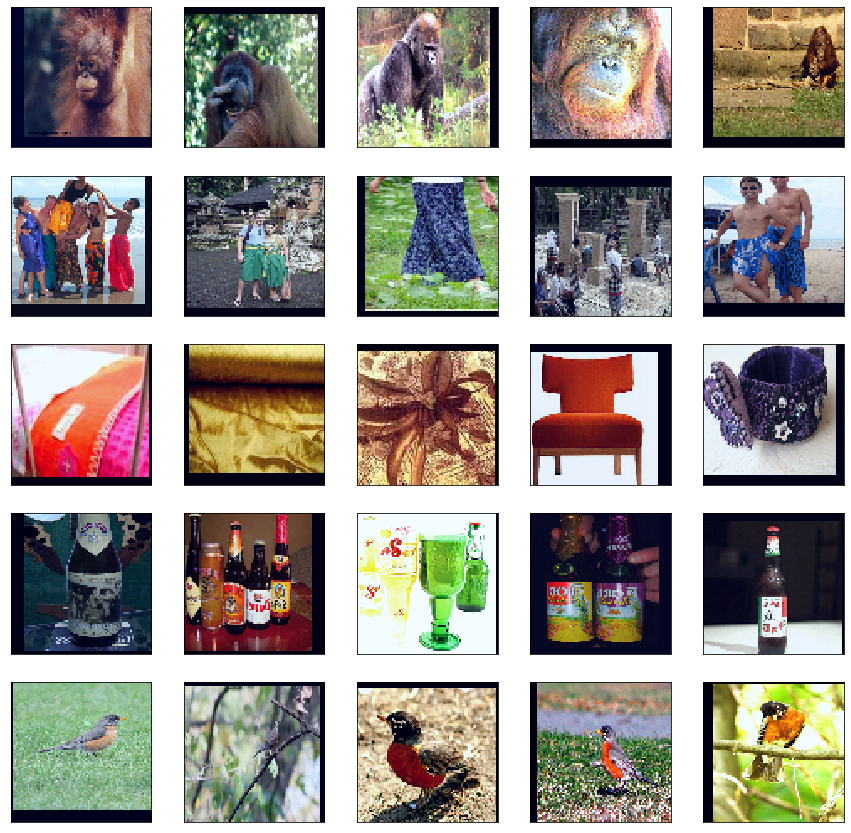

In [31]:
for i in range(batch_size):
    fig, axes = plt.subplots(n_way, n_shot, figsize=(SCALE * n_way, SCALE * n_shot))
    for j in range(n_way * n_shot):
        axes[j//n_way, j % n_way].set_xticks([])
        axes[j//n_way, j % n_way].set_yticks([])
        axes[j//n_way, j % n_way].imshow(naive_normalize(chw2hwc(support_x[i][j].numpy())))
    plt.show()
    print('\n' * 10)